<h2>
    <b> Task 2-Experimentation and Uplift testing</b>
</h2>

<p>
    Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.
</p>

<p>
    This can be broken down by:
</p> <br>
<b>1. Total Sales Revenue</b> <br>
<b>2. Total Number of Customers</b><br>
<b>3. Average Number of Transactions per Customer</b><br>

<p>
    Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.
</p>

<p>
    Main areas of Focus are :
</p><br>
    <b>1. Select control stores – Explore data, define metrics, visualize graphs</b><br>
    <b>2. Assessment of the trial – insights/trends by comparing trial stores with control stores</b><br>
    <b>3. Collate findings – summarize and provide recommendations</b><br>

<h3>
    LIBRARIES
</h3>

In [1]:
# importing all the libraries required for the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

<h3>
    IMPORTING DATA
</h3>

In [2]:
# importing QVI_data
qvi=pd.read_csv('QVI_data.csv')
qvi.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
qvi.tail()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget
264833,2373711,2018-12-14,88,241815,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,SMITHS,YOUNG SINGLES/COUPLES,Mainstream


In [4]:
qvi.shape

(264834, 12)

In [5]:
qvi.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
qvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [7]:
qvi.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<AxesSubplot: >

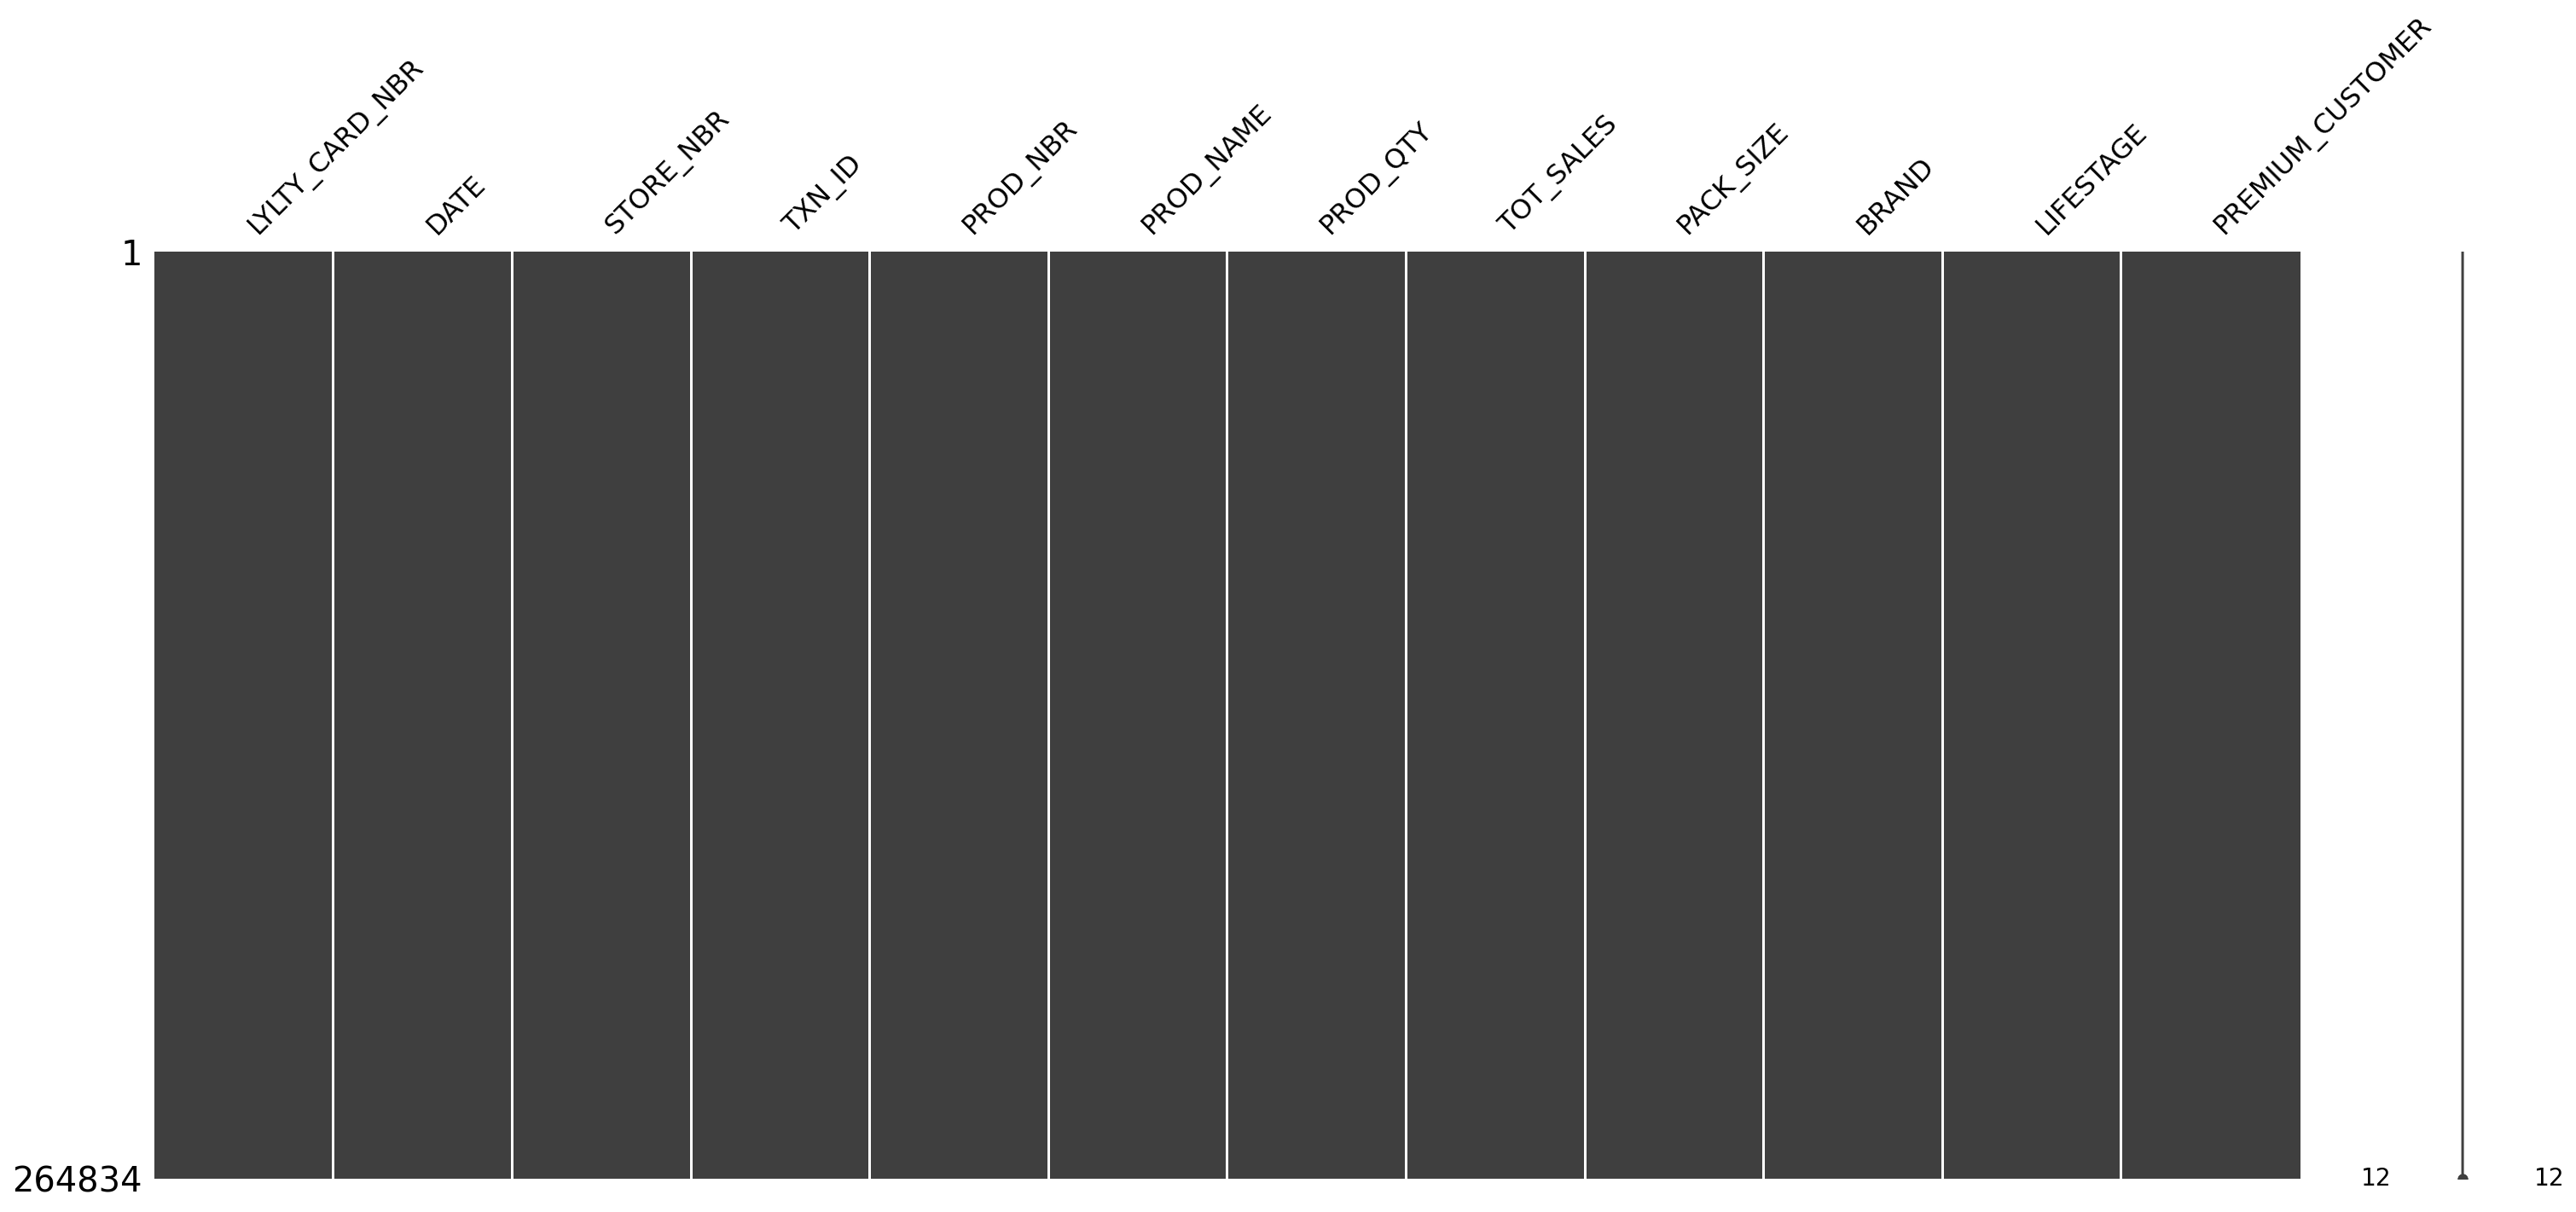

In [8]:
missingno.matrix(qvi)

<h3>
    SELECT CONTROL STORES
</h3>

<p>
    Let's first create the metric of interest and filters out stores that are present throughout the pre-trail period.
</p>

In [9]:
qvi['YEARMONTH']=[''.join(x.split('-')[0:2]) for x in qvi.DATE]
qvi['YEARMONTH']=pd.to_numeric(qvi['YEARMONTH'])
qvi['YEARMONTH'].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int64

In [10]:
#monthly stores total sales
TotalSales=qvi.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
TotalSales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [11]:
# Monthly store number of customers
NumofCust=qvi.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
NumofCust

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [12]:
# monthly store number of transactions per customer
NumofTran=qvi.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()/qvi.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
NumofTran


STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [13]:
#monthly store number of chips per transaction
NumofChips=qvi.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.nunique()/qvi.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()
NumofChips

STORE_NBR  YEARMONTH
1          201807       0.038462
           201808       0.069767
           201809       0.032258
           201810       0.044444
           201811       0.042553
                          ...   
272        201902       0.041667
           201903       0.037736
           201904       0.036364
           201905       0.050000
           201906       0.054054
Length: 3169, dtype: float64

In [14]:
# Monthly store average price per unit
AvgPriceperUnit=qvi.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.nunique()/qvi.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.nunique()
AvgPriceperUnit

STORE_NBR  YEARMONTH
1          201807       12.500000
           201808        6.666667
           201809       13.000000
           201810       12.000000
           201811       12.000000
                          ...    
272        201902        6.500000
           201903        7.500000
           201904        7.500000
           201905        7.500000
           201906        7.000000
Length: 3169, dtype: float64

In [15]:
#combining all into a dataframe
df=[TotalSales,NumofCust,NumofTran,NumofChips,AvgPriceperUnit]
pre_trail_obs=pd.concat(df,join='outer',axis=1)
pre_trail_obs

TOT_SALES  LYLTY_CARD_NBR         0         1          2
STORE_NBR YEARMONTH                                                          
1         201807         206.9              49  1.061224  0.038462  12.500000
          201808         176.1              42  1.023810  0.069767   6.666667
          201809         278.8              59  1.050847  0.032258  13.000000
          201810         188.1              44  1.022727  0.044444  12.000000
          201811         192.6              46  1.021739  0.042553  12.000000
...                        ...             ...       ...       ...        ...
272       201902         395.5              45  1.066667  0.041667   6.500000
          201903         442.3              50  1.060000  0.037736   7.500000
          201904         445.1              54  1.018519  0.036364   7.500000
          201905         314.6              34  1.176471  0.050000   7.500000
          201906         312.1              34  1.088235  0.054054   7.000000

[3169 rows x 5 columns]

In [16]:
#Rename the columns
pre_trail_obs.rename(columns={'TOT_SALES':'TotalSales','LYLTY_CARD_NBR':'NumofCust',0:'NumofTran',1:'NumofChips',2:'AvgPriceperUnit'},inplace=True)
pre_trail_obs

TotalSales  NumofCust  NumofTran  NumofChips  \
STORE_NBR YEARMONTH                                                 
1         201807          206.9         49   1.061224    0.038462   
          201808          176.1         42   1.023810    0.069767   
          201809          278.8         59   1.050847    0.032258   
          201810          188.1         44   1.022727    0.044444   
          201811          192.6         46   1.021739    0.042553   
...                         ...        ...        ...         ...   
272       201902          395.5         45   1.066667    0.041667   
          201903          442.3         50   1.060000    0.037736   
          201904          445.1         54   1.018519    0.036364   
          201905          314.6         34   1.176471    0.050000   
          201906          312.1         34   1.088235    0.054054   

                     AvgPriceperUnit  
STORE_NBR YEARMONTH                   
1         201807           12.500000  
          201808            6.666667  
          201809           13.000000  
          201810           12.000000  
          201811           12.000000  
...                              ...  
272       201902            6.500000  
          201903            7.500000  
          201904            7.500000  
          201905            7.500000  
          201906            7.000000  

[3169 rows x 5 columns]

In [17]:
a=pd.pivot_table(qvi,index='STORE_NBR',columns='YEARMONTH',values='TXN_ID',aggfunc='count')
a

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [18]:
a.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

<AxesSubplot: >

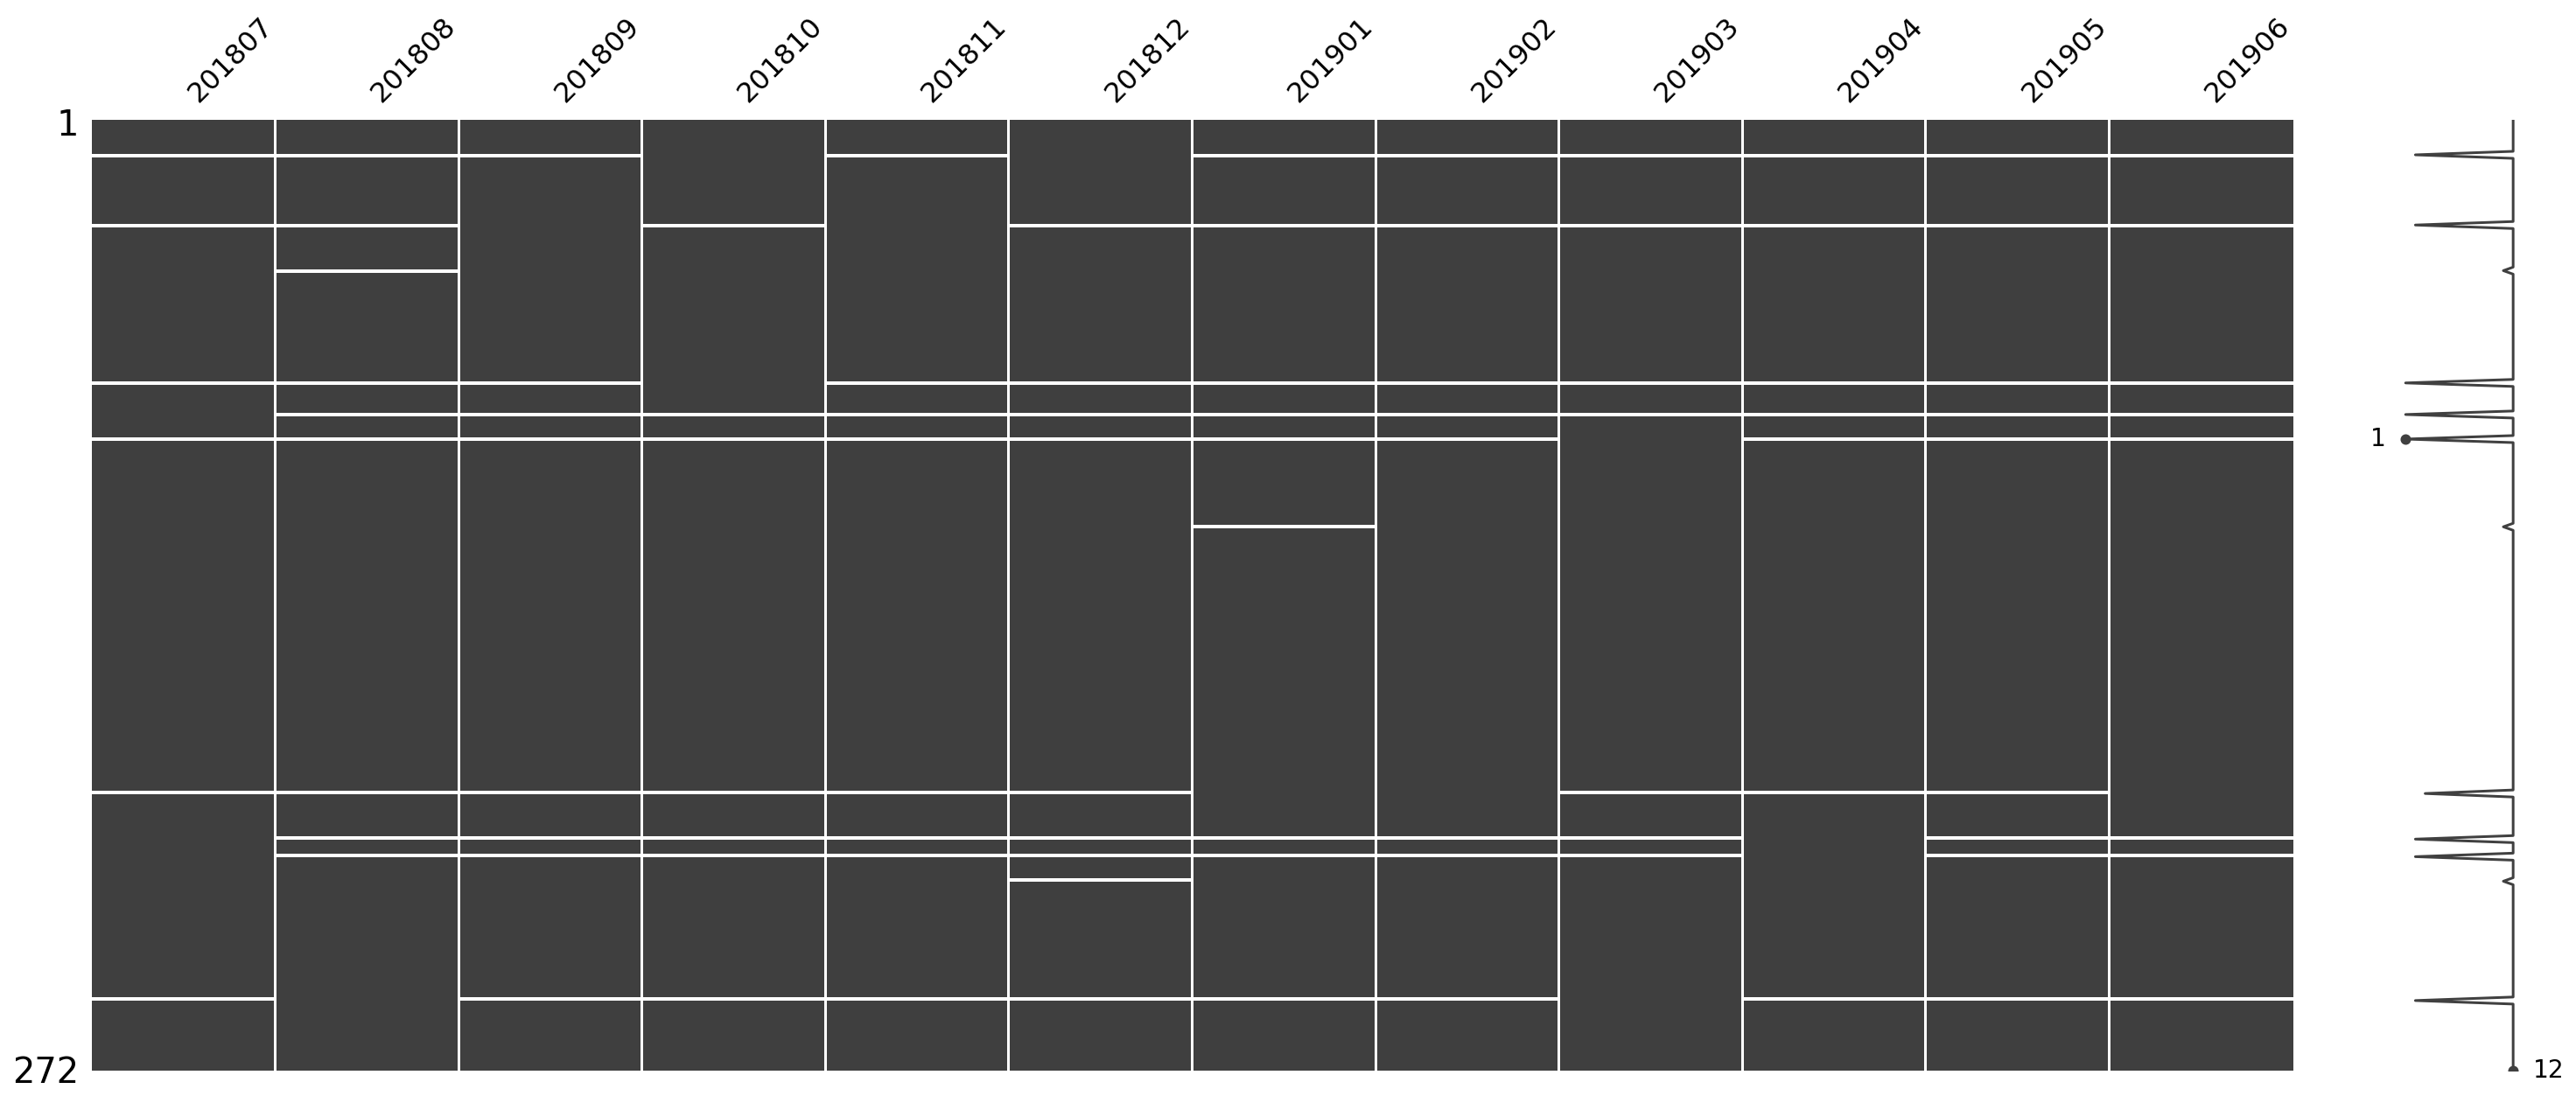

In [19]:
missingno.matrix(a)

In [20]:
null_store=a[a.isnull().any(axis=1)].index.tolist()
null_store

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [21]:
len(null_store)

12

In [22]:
#Now lets drop these from pre trail observation
pre_trail_obs

TotalSales  NumofCust  NumofTran  NumofChips  \
STORE_NBR YEARMONTH                                                 
1         201807          206.9         49   1.061224    0.038462   
          201808          176.1         42   1.023810    0.069767   
          201809          278.8         59   1.050847    0.032258   
          201810          188.1         44   1.022727    0.044444   
          201811          192.6         46   1.021739    0.042553   
...                         ...        ...        ...         ...   
272       201902          395.5         45   1.066667    0.041667   
          201903          442.3         50   1.060000    0.037736   
          201904          445.1         54   1.018519    0.036364   
          201905          314.6         34   1.176471    0.050000   
          201906          312.1         34   1.088235    0.054054   

                     AvgPriceperUnit  
STORE_NBR YEARMONTH                   
1         201807           12.500000  
          201808            6.666667  
          201809           13.000000  
          201810           12.000000  
          201811           12.000000  
...                              ...  
272       201902            6.500000  
          201903            7.500000  
          201904            7.500000  
          201905            7.500000  
          201906            7.000000  

[3169 rows x 5 columns]

In [23]:
len(pre_trail_obs)

3169

In [24]:
pre_trail_obs.reset_index(inplace=True)
pre_trail_obs

,STORE_NBR,YEARMONTH,TotalSales,NumofCust,NumofTran,NumofChips,AvgPriceperUnit
0,1,201807,206.9,49,1.061224,0.038462,12.500000
1,1,201808,176.1,42,1.023810,0.069767,6.666667
2,1,201809,278.8,59,1.050847,0.032258,13.000000
3,1,201810,188.1,44,1.022727,0.044444,12.000000
4,1,201811,192.6,46,1.021739,0.042553,12.000000
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,0.041667,6.500000
3165,272,201903,442.3,50,1.060000,0.037736,7.500000
3166,272,201904,445.1,54,1.018519,0.036364,7.500000
3167,272,201905,314.6,34,1.176471,0.050000,7.500000


In [25]:
# Drop null stores from pre trail observation
pre_trail_obs= pre_trail_obs[~pre_trail_obs['STORE_NBR'].isin(null_store)]
len(pre_trail_obs)

3120

In [26]:
pre_trail_meas=pre_trail_obs.loc[pre_trail_obs['YEARMONTH']<201902, :]
len(pre_trail_meas)

1820

In [27]:
pre_trail_meas

,STORE_NBR,YEARMONTH,TotalSales,NumofCust,NumofTran,NumofChips,AvgPriceperUnit
0,1,201807,206.9,49,1.061224,0.038462,12.500000
1,1,201808,176.1,42,1.023810,0.069767,6.666667
2,1,201809,278.8,59,1.050847,0.032258,13.000000
3,1,201810,188.1,44,1.022727,0.044444,12.000000
4,1,201811,192.6,46,1.021739,0.042553,12.000000
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,0.055556,7.500000
3160,272,201810,430.6,44,1.136364,0.040000,7.000000
3161,272,201811,376.2,41,1.097561,0.044444,7.000000
3162,272,201812,403.9,47,1.000000,0.042553,8.500000


In [28]:
# Create a function which calculates the correlation between trial store and other stores based on a single metric
def calcCorrTable(metricCol, storeComparison, inputTable=pre_trail_meas):
  control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
  corrs = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
  trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
  for control in control_store_nbrs:
    concat_df = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
    control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index()
    concat_df["Corr_Score"] = trial_store.corrwith(control_store, axis=1)
    concat_df["Trial_Str"] = storeComparison
    concat_df["Ctrl_Str"] = control
    concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
    corrs = pd.concat([corrs, concat_df])
  return corrs

In [29]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calcCorrTable(["TotalSales", "NumofCust", "NumofTran", "NumofChips", "AvgPriceperUnit"], trial_num)])
    
corr_table

,YEARMONTH,Trial_Str,Ctrl_Str,Corr_Score
0,201807,77,1,0.058271
1,201808,77,1,0.022681
2,201809,77,1,-0.007025
3,201810,77,1,-0.032030
4,201811,77,1,0.018326
...,...,...,...,...
2,201809,88,272,0.532834
3,201810,88,272,0.590864
4,201811,88,272,0.566113
5,201812,88,272,0.594131


In [30]:
# Create another function which calculates a standardised magnitude difference
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable=pre_trail_meas):
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df  = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index()[metricCol])
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        dists = pd.concat([dists, concat_df])
    for col in metricCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists

In [31]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(["TotalSales", "NumofCust", "NumofTran", "NumofChips", "AvgPriceperUnit"], trial_num)])
dist_table

,TotalSales,NumofCust,NumofTran,NumofChips,AvgPriceperUnit,YEARMONTH,Trial_Str,Ctrl_Str,magnitude
0,0.935431,0.980769,0.956123,0.997811,0.969697,201807,77,1,0.967966
1,0.942972,0.951923,0.993541,0.992417,0.797980,201808,77,1,0.935767
2,0.961503,0.836538,0.991768,0.986230,0.909091,201809,77,1,0.937026
3,0.988221,0.932692,0.989036,0.991457,0.909091,201810,77,1,0.962099
4,0.962149,0.951923,0.868852,0.996973,0.939394,201811,77,1,0.943858
...,...,...,...,...,...,...,...,...,...
2,0.207554,0.286822,0.469697,0.950494,0.566667,201809,88,272,0.496247
3,0.346797,0.387597,0.534816,0.966234,0.666667,201810,88,272,0.580422
4,0.286706,0.310078,0.615078,0.961719,0.533333,201811,88,272,0.541383
5,0.347151,0.387597,0.343915,0.963971,0.633333,201812,88,272,0.535194


<p>
    We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores by using correlation and magnitude distance.
</p>

In [32]:
# Combining both functions
def combine_corr_dist(metricCol, storeComparison, inputTable=pre_trail_obs):
    corrs = calcCorrTable(metricCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEARMONTH", "Trial_Str", "Ctrl_Str"])
    return combine

In [33]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TotalSales"], trial_num)])

In [34]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [35]:
# determining top 5 highest composite score for each trial based on Total sales
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
42          77        46         1.0   0.979689   0.989844
200         77       214         1.0   0.976550   0.988275
165         77       176         1.0   0.975658   0.987829
177         77       188         1.0   0.975329   0.987664
218         77       233         1.0   0.975227   0.987613 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
401         86       155    0.833333   0.956987   0.895160
471         86       229    0.833333   0.951598   0.892466
356         86       109    0.833333   0.951034   0.892183
344         86        97    0.833333   0.937158   0.885246
469         86       227    0.833333   0.936647   0.884990 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
551         88        40         1.0   0.935675   0.967837
538         88        26         1.0   0.892871   0.946435
568         88        58         1.0   0.889543   0.944772
589         88        81         1.0   0.884216   0.

/tmp/ipykernel_544/3802925524.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()


In [36]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dist(["NumofCust"], trial_num)])

In [37]:
# determining top 5 highest composite score for each trial based on number of customers

grouped_comparison_table2 = compare_metrics_table2.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table2["CompScore"] = (corr_weight * grouped_comparison_table2["Corr_Score"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
218         77       233         1.0   0.972756   0.986378
38          77        41         1.0   0.970353   0.985176
15          77        17         1.0   0.963141   0.981571
60          77        64         1.0   0.959135   0.979567
105         77       115         1.0   0.955929   0.977965 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
401         86       155         1.0   0.960177   0.980088
471         86       229         1.0   0.959440   0.979720
310         86        57         1.0   0.953540   0.976770
467         86       225         1.0   0.952802   0.976401
424         86       178         1.0   0.950590   0.975295 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
736         88       237         1.0   0.975379   0.987689
551         88        40         1.0   0.931818   0.965909
703         88       201         1.0   0.930556   0.965278
668         88       165         1.0   0.929924   0.

/tmp/ipykernel_544/2429271419.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_comparison_table2 = compare_metrics_table2.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()


In [38]:
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    b = grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')

Trial_Str  Ctrl_Str
77         233         0.986996
           41          0.985558
           188         0.982013
dtype: float64 



Trial_Str  Ctrl_Str
86         155         0.937624
           229         0.936093
           109         0.930052
dtype: float64 

Trial_Str  Ctrl_Str
88         40          0.966873
           26          0.953016
           58          0.950290
dtype: float64 



<p>
    Similarities based on total sales:
</p><br>
<b>1. Trial store 77: Store 46, 214, 176</b><br>
<b>2. Trial store 86: Store 155, 229,109</b><br>
<b>3. Trial store 88: Store 40, 26, 58</b><br>

<p>
    Similarities based on No. of Customers:
</p><br>
<b>1. Trail store 77:Store 233,41,17</b><br>
<b>2. Trial store 86: Store 155,229,57</b><br>
<b>3. Trial store 88: Store 237, 40,201</b>

<p>
    Final Similarities based on Highest average of both features combined:
</p><br>
<b>1. Trial store 77:  Store 233
</b><br>
<b>2. Trial store 86: Store 155</b><br>
<b>3. Trial store 88: Store 40</b><br>

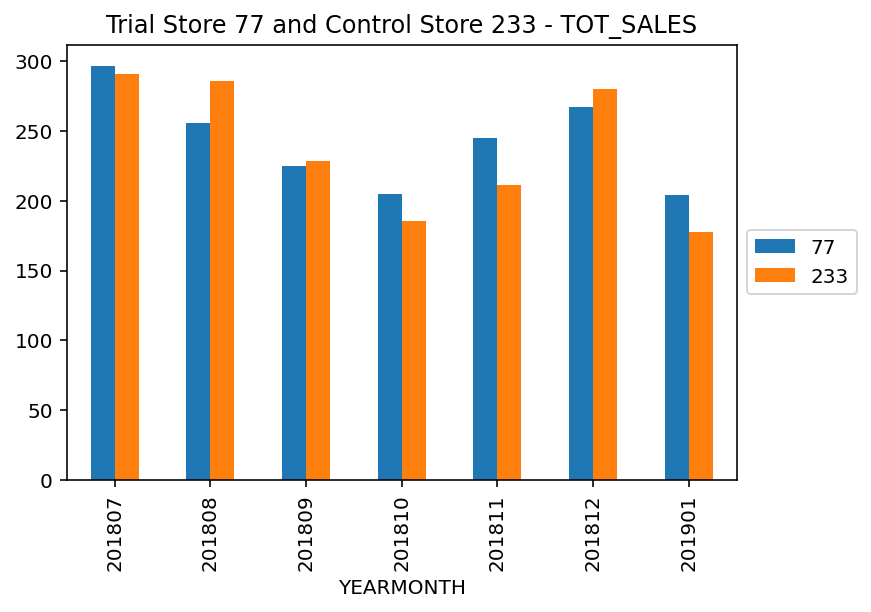

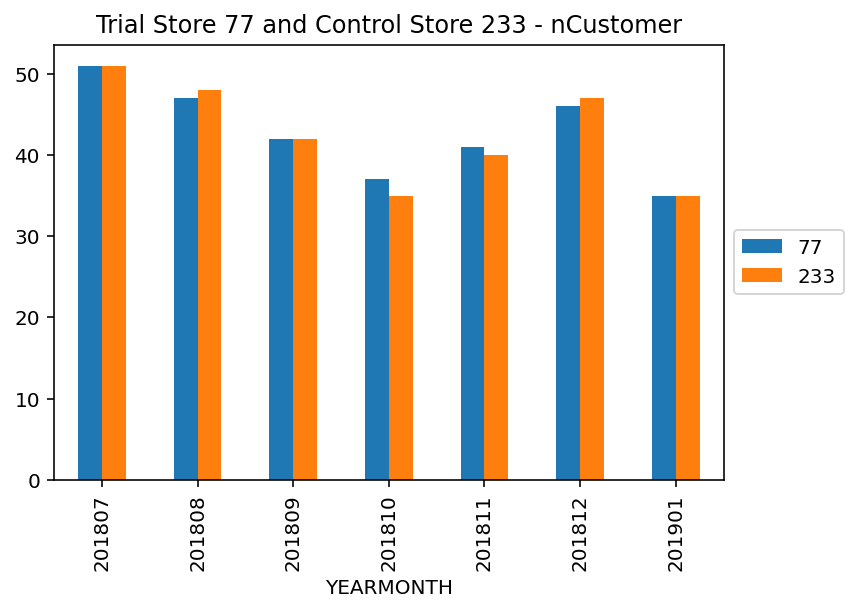

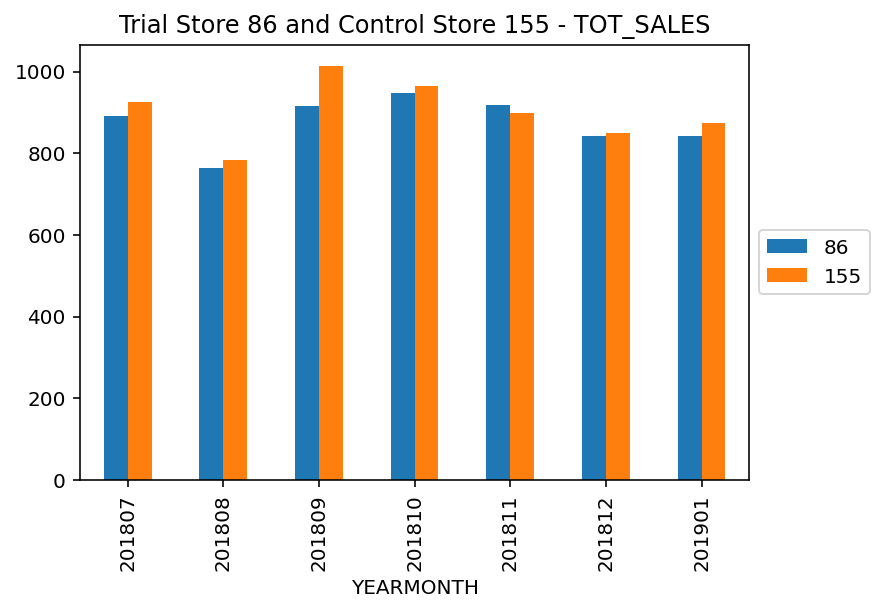

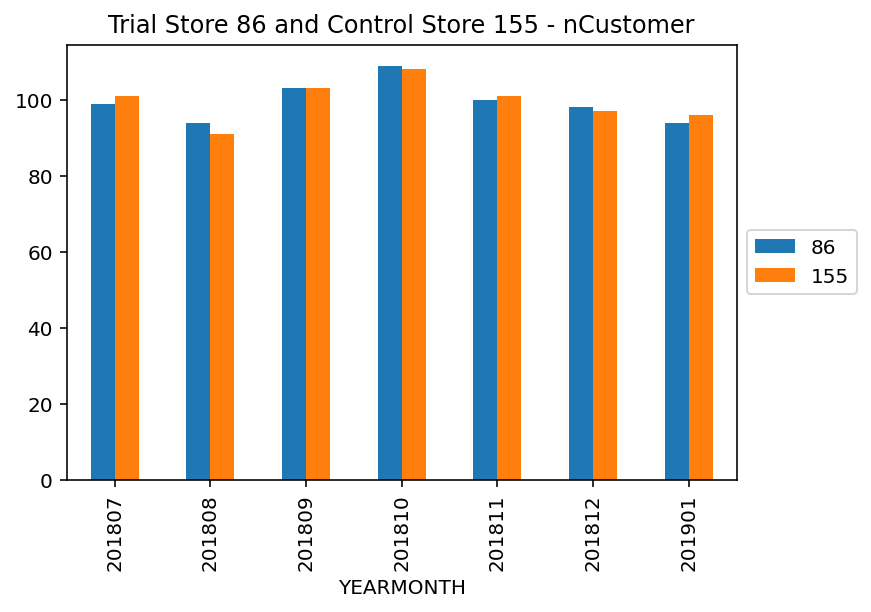

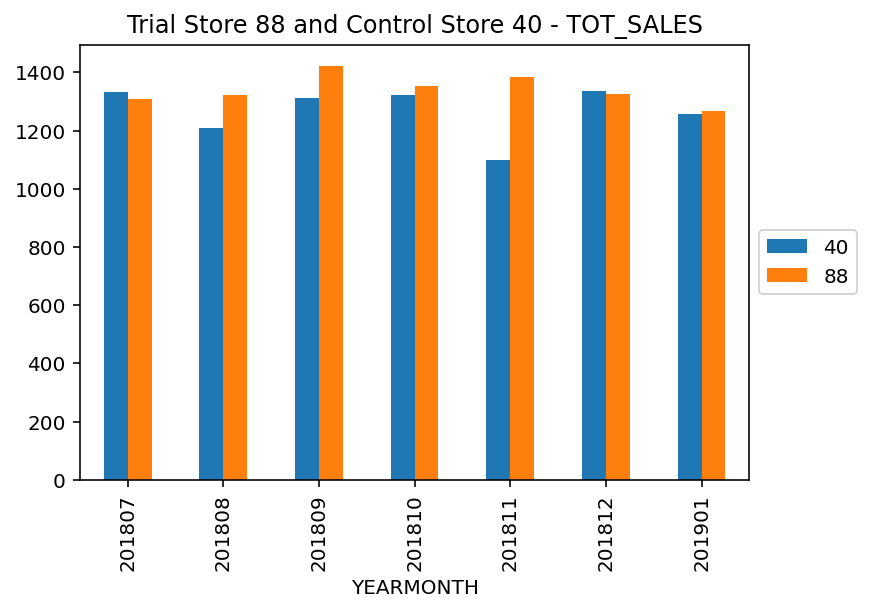

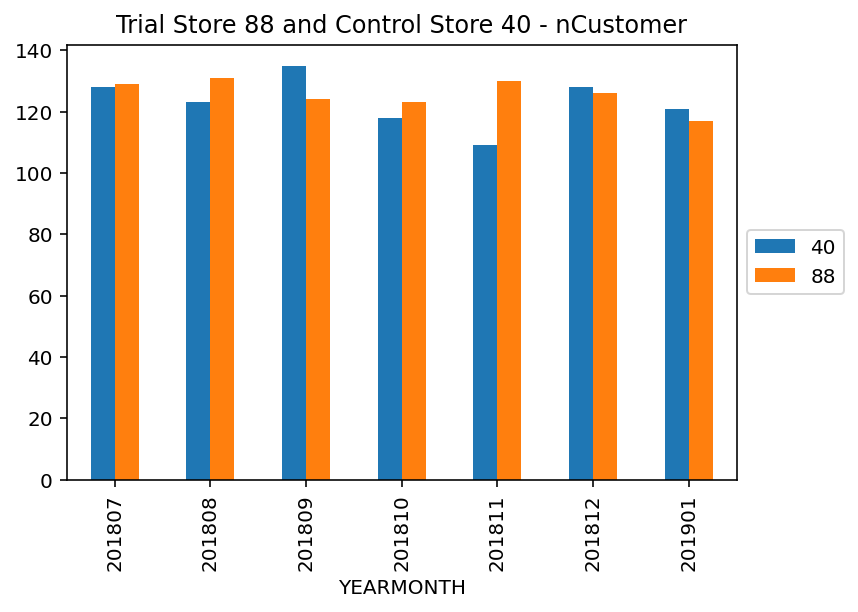

In [39]:
trial_control_dic = {77:233, 86:155, 88:40}
for key, val in trial_control_dic.items():
    pre_trail_meas[pre_trail_meas["STORE_NBR"].isin([key, val])].groupby(
        ["YEARMONTH", "STORE_NBR"]).sum()["TotalSales"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    pre_trail_meas[pre_trail_meas["STORE_NBR"].isin([key, val])].groupby(
    ["YEARMONTH", "STORE_NBR"]).sum()["NumofCust"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - nCustomer")
    plt.show()
    print('\n')

<p>
    Next we'll compare the performance of Trial stores to Control stores during the trial period. To ensure their performance is comparable during Trial period, we need to scale (multiply to ratio of trial / control) all of Control stores' performance to Trial store's performance during pre-trial. Starting with TotalSales.
</p>

In [40]:
#Ratio of Store 77 and its Control store.
sales_ratio_77 = pre_trail_meas[pre_trail_meas["STORE_NBR"] == 77]["TotalSales"].sum() / pre_trail_meas[pre_trail_meas["STORE_NBR"] == 233]["TotalSales"].sum()

#Ratio of Store 86 and its Control store.
sales_ratio_86 =pre_trail_meas[pre_trail_meas["STORE_NBR"] == 86]["TotalSales"].sum() /pre_trail_meas[pre_trail_meas["STORE_NBR"] == 155] ["TotalSales"].sum()

#Ratio of Store 77 and its Control store.
sales_ratio_88 =pre_trail_meas[pre_trail_meas["STORE_NBR"] == 88]["TotalSales"].sum() / pre_trail_meas[pre_trail_meas["STORE_NBR"] == 40] ["TotalSales"].sum()

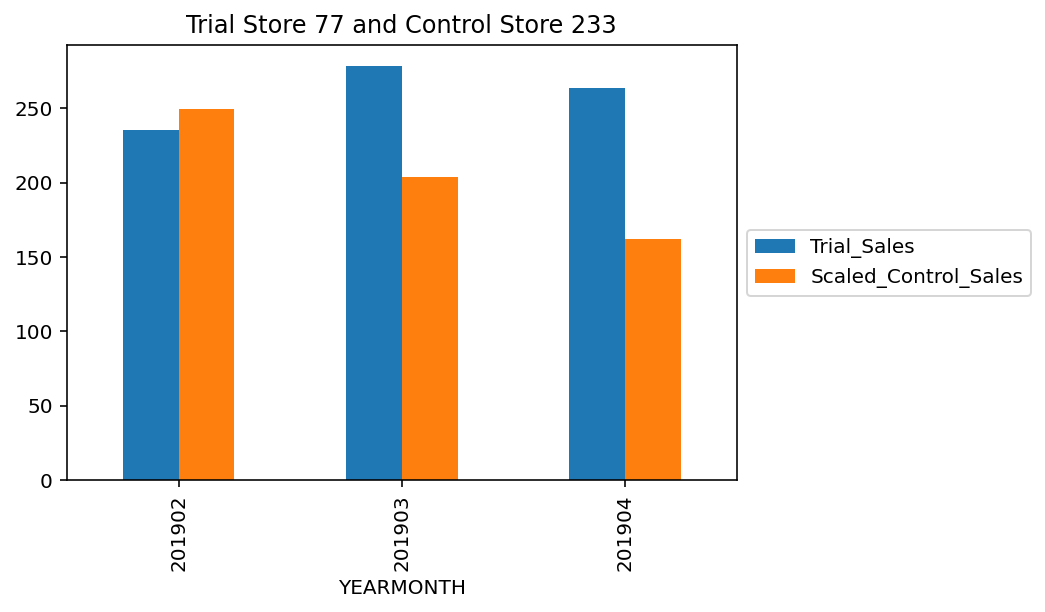

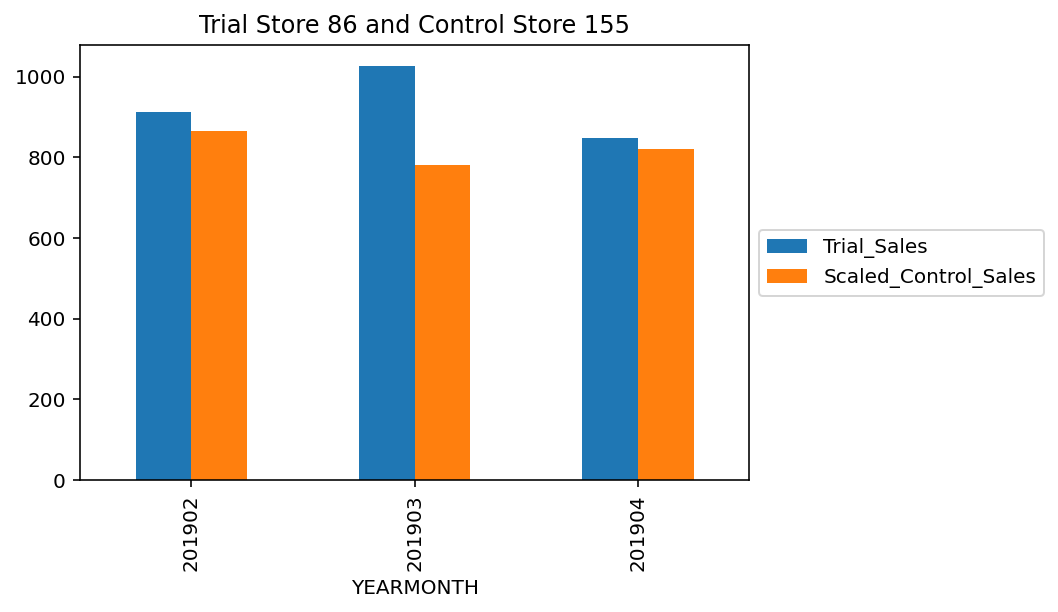

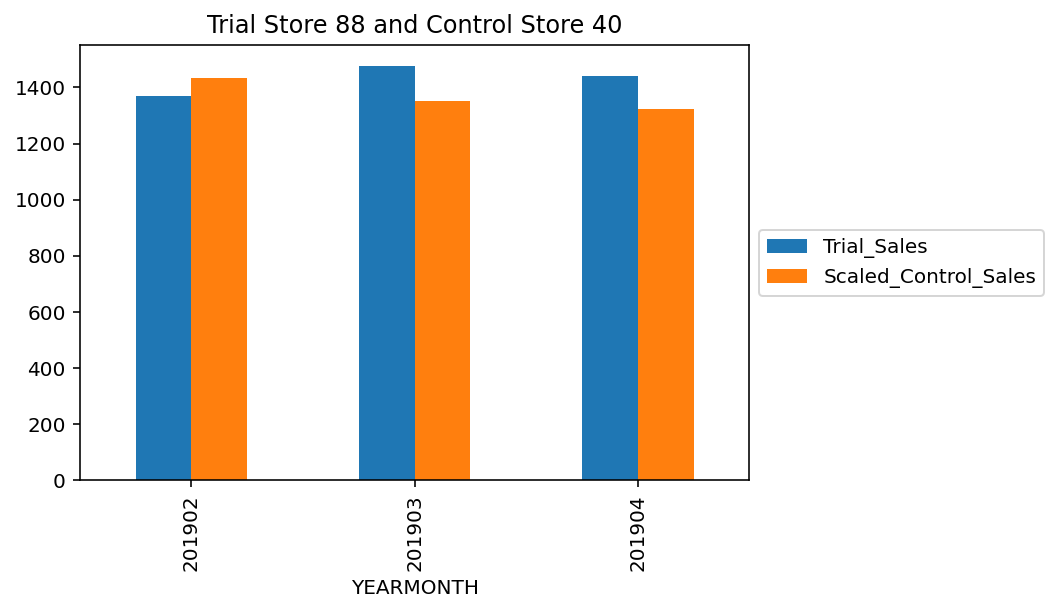

In [41]:

trial_full_observ = pre_trail_obs[(pre_trail_obs["YEARMONTH"] >= 201902) & (pre_trail_obs["YEARMONTH"] <= 201904)]
scaled_sales_control_stores =pre_trail_obs[pre_trail_obs["STORE_NBR"].isin([233, 155, 40])][["STORE_NBR", "YEARMONTH", "TotalSales"]]

def scaler(row):
    if row["STORE_NBR"] == 233:
        return row["TotalSales"] * sales_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["TotalSales"] * sales_ratio_86
    elif row["STORE_NBR"] == 40:
        return row["TotalSales"] * sales_ratio_88

scaled_sales_control_stores["ScaledSales"] = scaled_sales_control_stores.apply(lambda row: scaler(row), axis=1)

trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["YEARMONTH"] >= 201902) & (scaled_sales_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["YEARMONTH"] < 201902]

percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TotalSales"]]
    percentage_diff[trial] = b["TotalSales"].sum() / a["ScaledSales"].sum()
    b[["YEARMONTH", "TotalSales"]].merge(a[["YEARMONTH", "ScaledSales"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TotalSales":"Trial_Sales"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [42]:
percentage_diff

{77: 1.2615468650086281, 86: 1.1315014357363697, 88: 1.043458345854219}

In [43]:
temp1 = scaled_sales_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index().drop(["TotalSales", "index"], axis=1)
temp2 = pre_trail_obs[pre_trail_obs["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "TotalSales"]].reset_index().drop(["index", "YEARMONTH"], axis=1)
scaledsales_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledsales_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledSales", "t_STORE_NBR", "t_TotalSales"]
scaledsales_vs_trial["Sales_Percentage_Diff"] = (scaledsales_vs_trial["t_TotalSales"] - scaledsales_vs_trial["c_ScaledSales"]) / (((scaledsales_vs_trial["t_TotalSales"] + scaledsales_vs_trial["c_ScaledSales"])/2))
def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledsales_vs_trial["trial_period"] = scaledsales_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledSales,t_STORE_NBR,t_TotalSales,Sales_Percentage_Diff,trial_period
7,233,201902,249.762622,77,235.0,-0.060907,trial
8,233,201903,203.802205,77,278.5,0.309755,trial
9,233,201904,162.345704,77,263.5,0.475075,trial
19,155,201902,864.522060,86,913.2,0.054764,trial
20,155,201903,780.320405,86,1026.8,0.272787,trial
21,155,201904,819.317024,86,848.2,0.034642,trial
31,40,201902,1434.399269,88,1370.2,-0.045781,trial
32,40,201903,1352.064709,88,1477.2,0.088458,trial
33,40,201904,1321.797762,88,1439.4,0.085182,trial


Check significance of Trial minus Control stores TOT_SALES Percentage Difference Pre-Trial vs Trial.

Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

Step 2: Proof control and trial stores are similar statistically

Check p-value of control store's Pre-Trial vs Trial store's Pre-Trial. If <5%, it is significantly different. If >5%, it is not significantly different (similar).

Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

Check T-Value of Percentage Difference of each Trial month (Feb, March, April 2019). Mean is mean of Percentage Difference during pre-trial. Standard deviation is stdev of Percentage Difference during pre-trial. Formula is Trial month's Percentage Difference minus Mean, divided by Standard deviation. Compare each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [44]:
from scipy.stats import ttest_ind, t

# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   equal_var=False), '\n')
    #print(len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]), len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]))
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num])])-1))

Store 40
Ttest_indResult(statistic=-0.5958372343168558, pvalue=0.5722861621434027) 

Store 155
Ttest_indResult(statistic=1.4291956879290917, pvalue=0.1972705865160342) 

Store 233
Ttest_indResult(statistic=1.1911026010974521, pvalue=0.2944500606486209) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [45]:
b = pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == 40]["ScaledSales"]
c = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == 40]["ScaledSales"]

Null hypothesis is true. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.

In [46]:
# Step 2
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pre_trail_meas[pre_trail_meas["STORE_NBR"] == trial]["TotalSales"],
                   pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"],
                   equal_var=True), '\n')
    #print(len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["TOT_SALES"]),len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"]))

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pre_trail_meas[pre_trail_meas["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=-1.2533353315065932e-15, pvalue=0.999999999999999) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=3.1048311203382156e-15, pvalue=0.9999999999999976) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-5.69358613974361e-15, pvalue=0.9999999999999956) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


Null hypothesis is true. There isn't any statistically significant difference between Trial store's sales and Control store's scaled-sales performance during pre-trial.

In [47]:
# Step 3
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == cont) & (scaledsales_vs_trial["trial_period"]=="pre")]
    std = temp_pre["Sales_Percentage_Diff"].std()
    mean = temp_pre["Sales_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledsales_vs_trial[(scaledsales_vs_trial["YEARMONTH"] == t_month) & (scaledsales_vs_trial["t_STORE_NBR"] == trial)]["Sales_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233


201902 : -0.7171038288055838
201903 : 3.035317928855674
201904 : 4.708944418758219


Trial store: 86 , Control store: 155
201902 : 1.4133618775921597
201903 : 7.123063846042147
201904 : 0.8863824572944234


Trial store: 88 , Control store: 40
201902 : -0.5481633746817577
201903 : 1.0089992743637823
201904 : 0.9710006270463672


Critical t-value for 95% confidence interval:
1.9431802803927816


<p>
    There are 3 months' increase in performance that are statistically significant (Above the 95% confidence interval t-score):
</p><br>
<b>March and April trial months for trial store 77</b><br>
<b>March trial months for trial store 86</b>

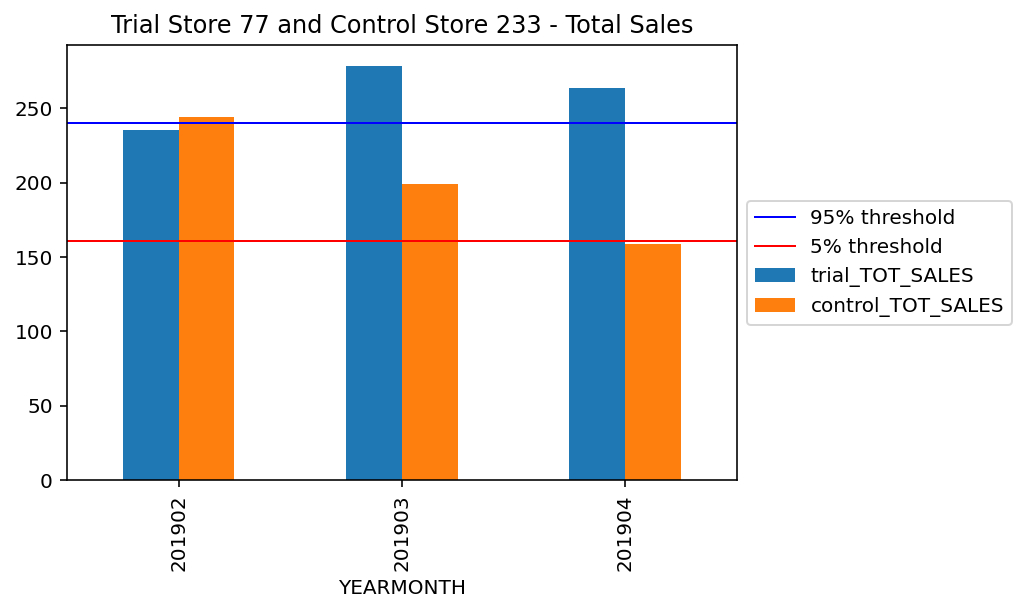

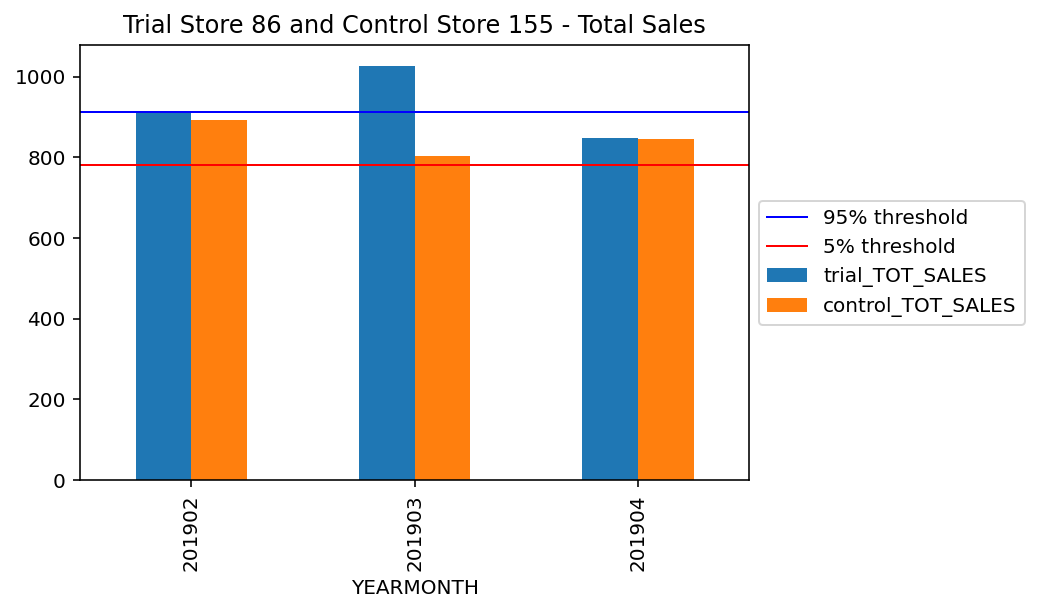

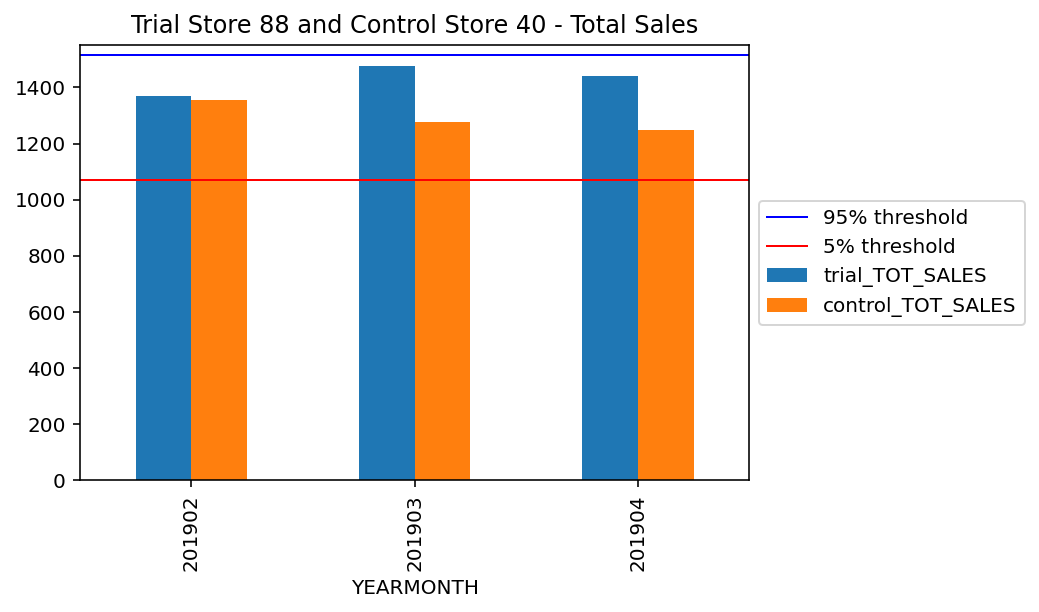

In [48]:
for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control].rename(columns={"TotalSales": "control_TOT_SALES"})
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TotalSales"]].rename(columns={"TotalSales": "trial_TOT_SALES"})
    comb = b[["YEARMONTH", "trial_TOT_SALES"]].merge(a[["YEARMONTH", "control_TOT_SALES"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_sales = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]["TotalSales"]
    std = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == control) & (scaledsales_vs_trial["trial_period"]=="pre")]["Sales_Percentage_Diff"].std()
    thresh95 = cont_sc_sales.mean() + (cont_sc_sales.mean() * std * 2)
    thresh5 = cont_sc_sales.mean() - (cont_sc_sales.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Total Sales")
    plt.savefig("TS {} and CS {} - TOT_SALES.png".format(trial,control), bbox_inches="tight")

In [49]:
#Ratio of Store 77 and its Control store.
ncust_ratio_77 = pre_trail_meas[pre_trail_meas["STORE_NBR"] == 77]["NumofCust"].sum() /  pre_trail_meas[pre_trail_meas["STORE_NBR"] == 233]["NumofCust"].sum()

#Ratio of Store 86 and its Control store.
ncust_ratio_86 =  pre_trail_meas[pre_trail_meas["STORE_NBR"] == 86]["NumofCust"].sum() /  pre_trail_meas[pre_trail_meas["STORE_NBR"] == 155]["NumofCust"].sum()

#Ratio of Store 88 and its Control store.
ncust_ratio_88 =  pre_trail_meas[pre_trail_meas["STORE_NBR"] == 88]["NumofCust"].sum() /  pre_trail_meas[pre_trail_meas["STORE_NBR"]==40]["NumofCust"].sum()

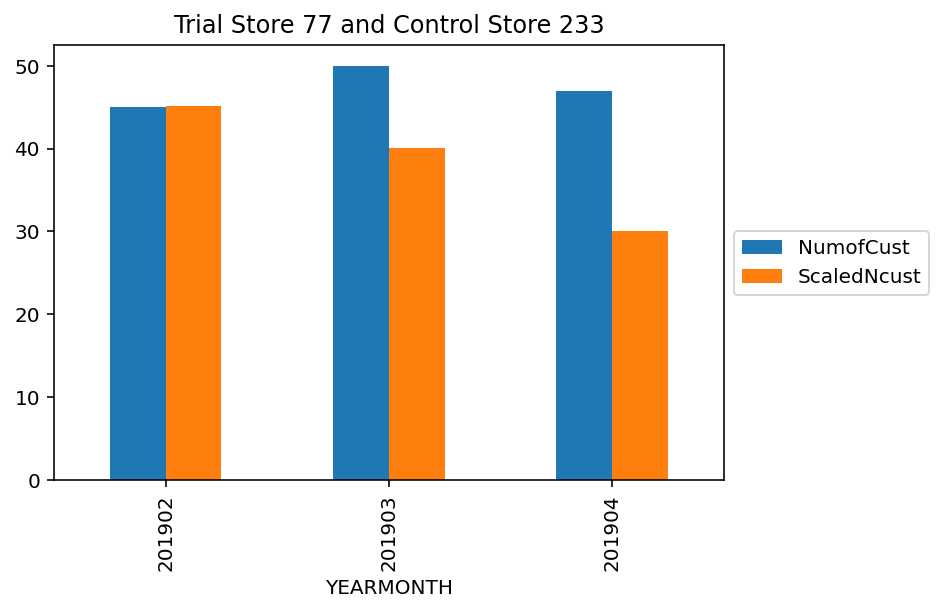

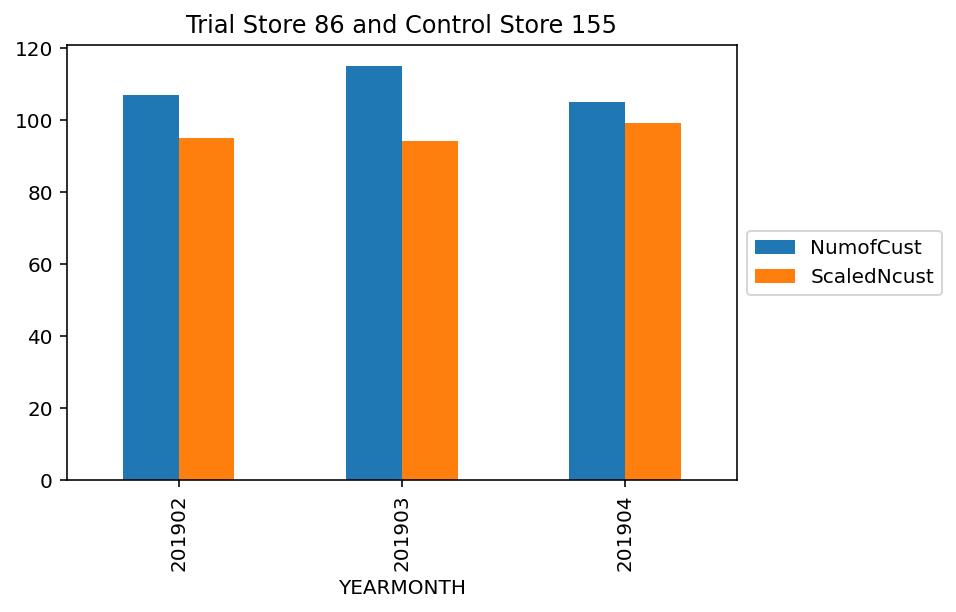

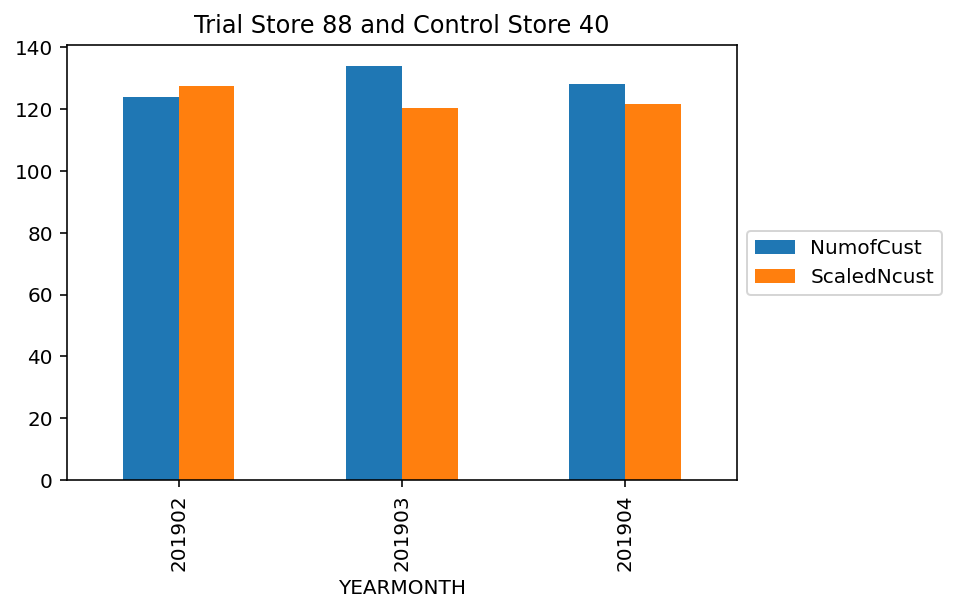

In [50]:
# trial_full_observ = full_observ[(full_observ["YEARMONTH"] >= 201902) & (full_observ["YEARMONTH"] <= 201904)]
scaled_ncust_control_stores = pre_trail_obs[pre_trail_obs["STORE_NBR"].isin([233, 155, 40])][["STORE_NBR", "YEARMONTH", "NumofCust"]]

def scaler_c(row):
    if row["STORE_NBR"] == 233:
        return row["NumofCust"] * ncust_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["NumofCust"] * ncust_ratio_86
    elif row["STORE_NBR"] == 40:
        return row["NumofCust"] * ncust_ratio_88

scaled_ncust_control_stores["ScaledNcust"] = scaled_ncust_control_stores.apply(lambda row: scaler_c(row), axis=1)

trial_scaled_ncust_control_stores = scaled_ncust_control_stores[(scaled_ncust_control_stores["YEARMONTH"] >= 201902) & (scaled_ncust_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_ncust_control_stores = scaled_ncust_control_stores[scaled_ncust_control_stores["YEARMONTH"] < 201902]

ncust_percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "NumofCust"]]
    ncust_percentage_diff[trial] = b["NumofCust"].sum() / a["ScaledNcust"].sum()
    b[["YEARMONTH", "NumofCust"]].merge(a[["YEARMONTH", "ScaledNcust"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_nCust", "TOT_SALES":"Trial_nCust"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [51]:
ncust_percentage_diff

{77: 1.2306529009742622, 86: 1.1354166666666667, 88: 1.0444876946258161}

In [52]:
temp1 = scaled_ncust_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index().drop(["NumofCust", "index"], axis=1)
temp2 = pre_trail_obs[pre_trail_obs["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "NumofCust"]].reset_index().drop(["index", "YEARMONTH"], axis=1)
scaledncust_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledncust_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledNcust", "t_STORE_NBR", "t_nCustomers"]
scaledncust_vs_trial["nCust_Percentage_Diff"] = (scaledncust_vs_trial["t_nCustomers"] - scaledncust_vs_trial["c_ScaledNcust"]) / (((scaledncust_vs_trial["t_nCustomers"] + scaledncust_vs_trial["c_ScaledNcust"])/2))

scaledncust_vs_trial["trial_period"] = scaledncust_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledNcust,t_STORE_NBR,t_nCustomers,nCust_Percentage_Diff,trial_period
7,233,201902,45.151007,77,45,-0.003350,trial
8,233,201903,40.134228,77,50,0.218913,trial
9,233,201904,30.100671,77,47,0.438370,trial
19,155,201902,95.000000,86,107,0.118812,trial
20,155,201903,94.000000,86,115,0.200957,trial
21,155,201904,99.000000,86,105,0.058824,trial
31,40,201902,127.610209,88,124,-0.028697,trial
32,40,201903,120.464037,88,134,0.106388,trial
33,40,201904,121.484919,88,128,0.052228,trial


<p>
    Check significance of Trial minus Control stores nCustomers Percentage Difference Pre-Trial vs Trial.
</p><br>
<p>
    Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.
</p><br>
<p>
    Step 2: Proof control and trial stores are similar statistically
</p><br>
<p>
    Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.
</p>

In [53]:
# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   equal_var=False), '\n')
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num])])-1))

Store 40
Ttest_indResult(statistic=0.644732693420032, pvalue=0.5376573016017127) 

Store 155
Ttest_indResult(statistic=1.3888888888888882, pvalue=0.204345986327886) 

Store 233
Ttest_indResult(statistic=0.8442563765225701, pvalue=0.4559280037660254) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [55]:
# Step 2
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pre_trail_meas[pre_trail_meas["STORE_NBR"] == trial]["NumofCust"],
                   pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == cont]["ScaledNcust"],
                   equal_var=True), '\n')

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pre_trail_meas[pre_trail_meas["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-7.648483953264653e-15, pvalue=0.999999999999994) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


In [56]:
# Step 3
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == cont) & (scaledncust_vs_trial["trial_period"]=="pre")]
    std = temp_pre["nCust_Percentage_Diff"].std()
    mean = temp_pre["nCust_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledncust_vs_trial[(scaledncust_vs_trial["YEARMONTH"] == t_month) & (scaledncust_vs_trial["t_STORE_NBR"] == trial)]["nCust_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.19886295797440687
201903 : 8.009609025380932
201904 : 16.114474772873923


Trial store: 86 , Control store: 155
201902 : 6.220524882227514
201903 : 10.52599074274189
201904 : 3.0763575852842706


Trial store: 88 , Control store: 40
201902 : -0.3592881735131531
201903 : 1.2575196020616801
201904 : 0.6092905590514273


Critical t-value for 95% confidence interval:
1.9431802803927816


<p>
    There are 5 months' increase in performance that are statistically significant (Above the 95% confidence interval t-score):
</p><br>
<b>March and April trial months for trial store 77</b><br>
<b>Feb, March and April trial months for trial store 86</b>

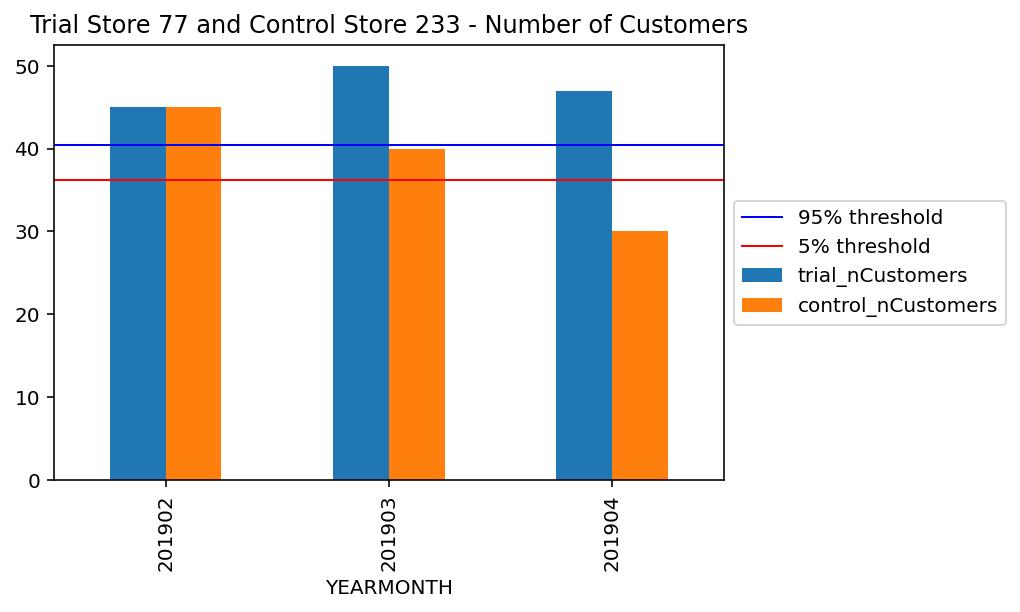

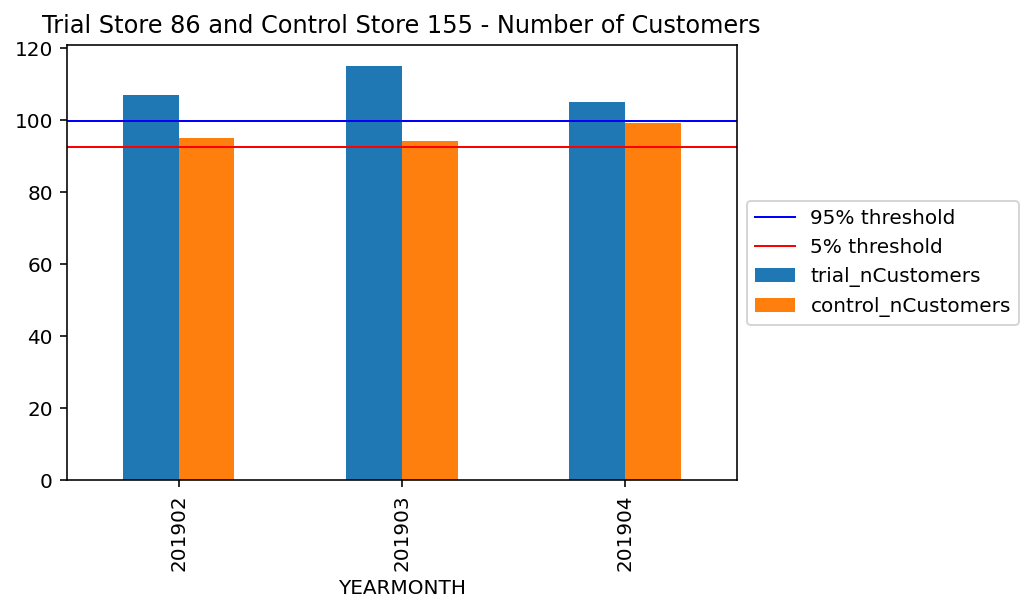

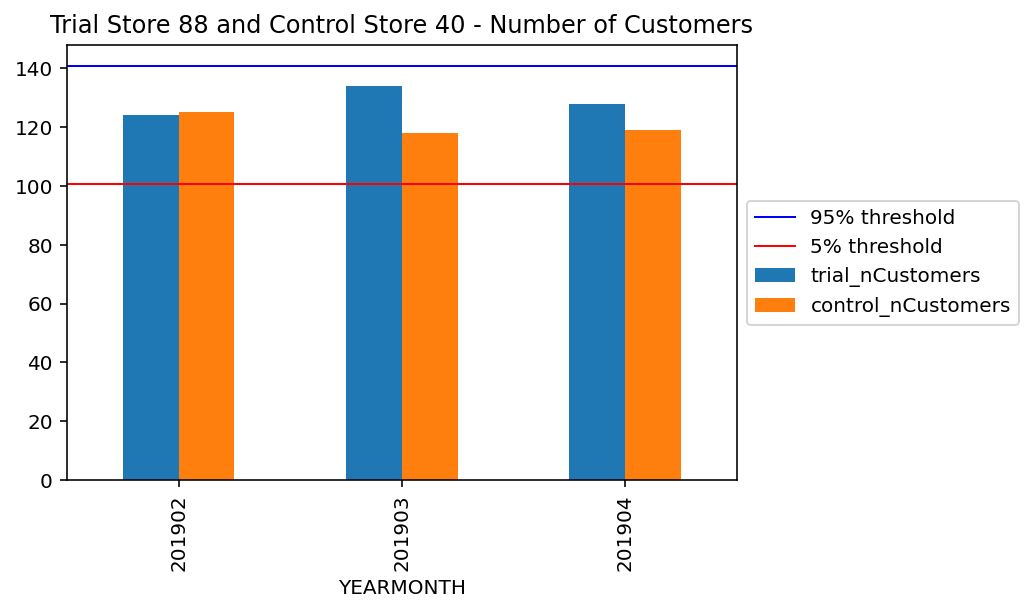

In [57]:
for trial, control in trial_control_dic.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control].rename(columns={"NumofCust": "control_nCustomers"})
    b = pre_trail_obs[pre_trail_obs["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "NumofCust"]].rename(columns={"NumofCust": "trial_nCustomers"})
    comb = b[["YEARMONTH", "trial_nCustomers"]].merge(a[["YEARMONTH", "control_nCustomers"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_ncust = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]["NumofCust"]
    std = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == control) & (scaledncust_vs_trial["trial_period"]=="pre")]["nCust_Percentage_Diff"].std()
    thresh95 = cont_sc_ncust.mean() + (cont_sc_ncust.mean() * std * 2)
    thresh5 = cont_sc_ncust.mean() - (cont_sc_ncust.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Number of Customers")
    plt.savefig("TS {} and CS {} - nCustomers.png".format(trial,control), bbox_inches="tight")

<p>
    We can see that Trial store 77 sales for Feb, March, and April exceeds 95% threshold of control store. Same goes to store 86 sales for all 3 trial months.
</p><br>
<b>1. Trial store 77: Control store 233</b><br>
<b>2. Trial store 86: Control store 155</b><br>
<b>3. Trial store 88: Control store 40</b><br>
<b>4. Both trial store 77 and 86 showed significant increase in Total Sales and Number of Customers during trial period. But not for trial store 88. Perhaps the client knows if there's anything about trial 88 that differs it from the other two trial.</b><br>
<b>5. Overall the trial showed positive significant result.</b>